# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
%store -r

Unable to restore variable 'ndvi_diff', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>


You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [2]:
# Import libraries

import pandas as pd
import earthpy
import rioxarray as rxr
import xarray as xr
from glob import glob

import matplotlib.pyplot as plt #for plotting
import hvplot.pandas
import hvplot.xarray #for interactive plotting with raster data

In [3]:
ndvi_paths

[PosixPath('/workspaces/data/water_rights_assignment/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001145000000_aid0001.tif'),
 PosixPath('/workspaces/data/water_rights_assignment/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001161000000_aid0001.tif'),
 PosixPath('/workspaces/data/water_rights_assignment/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001177000000_aid0001.tif'),
 PosixPath('/workspaces/data/water_rights_assignment/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001193000000_aid0001.tif'),
 PosixPath('/workspaces/data/water_rights_assignment/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001209000000_aid0001.tif'),
 PosixPath('/workspaces/data/water_rights_assignment/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001225000000_aid0001.tif'),
 PosixPath('/workspace

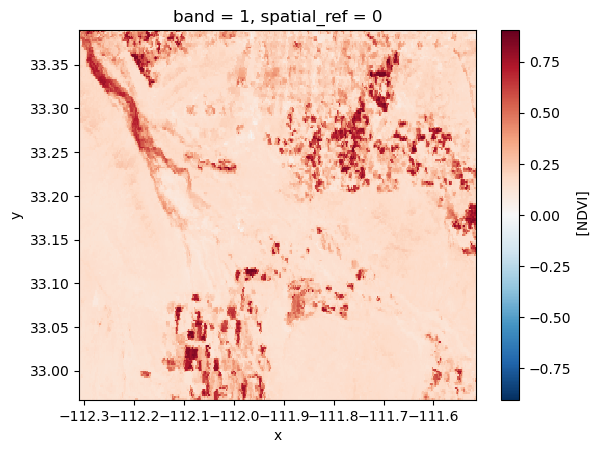

In [4]:
# plot the first tif image and last to see the difference in vegetation over time
plot_1st=rxr.open_rasterio(ndvi_paths[0], mask_and_scale=True).squeeze().plot()
plot_1st



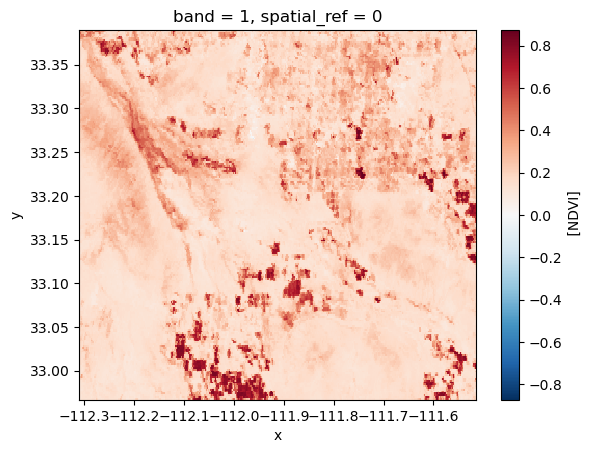

In [5]:
plot_last=rxr.open_rasterio(ndvi_paths[-1], mask_and_scale=True).squeeze().plot()
plot_last

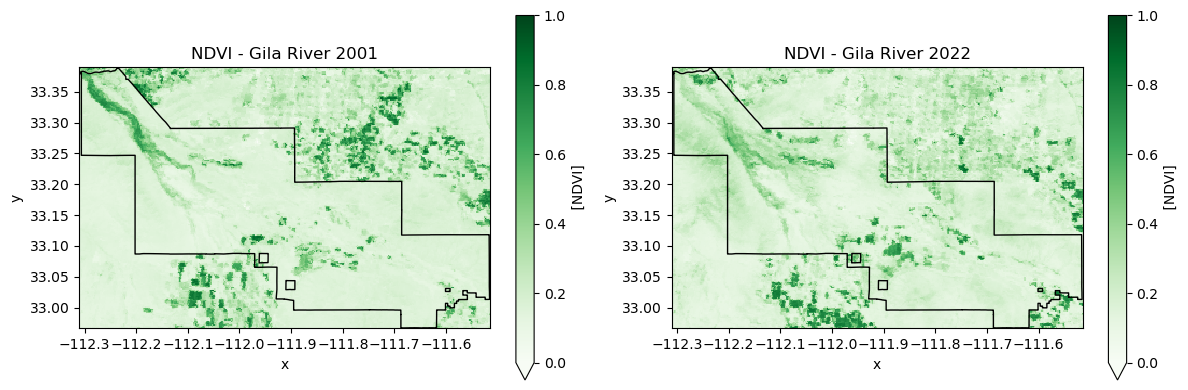

In [6]:

# Load rasters
plot_old = rxr.open_rasterio(ndvi_paths[0], mask_and_scale=True).squeeze()
plot_last = rxr.open_rasterio(ndvi_paths[-1], mask_and_scale=True).squeeze()

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


# First plot
plot_old.plot(ax=axes[0], cmap='Greens', vmin=0, vmax=1)
boundary_gdf.plot(ax=axes[0], edgecolor='black', facecolor='none', linewidth=1)
axes[0].set_title('NDVI - Gila River 2001')

#  Second plot
plot_last.plot(ax=axes[1], cmap='Greens', vmin=0, vmax=1)
boundary_gdf.plot(ax=axes[1], edgecolor='black', facecolor='none', linewidth=1)
axes[1].set_title('NDVI - Gila River 2022')

plt.tight_layout()
plt.show()


# STEP 3: Plot NDVI

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot the change in NDVI spatially</div></div><div class="callout-body-container callout-body"><p>Complete the following:</p>
<ul>
<li>Select data from 2021 to 2023 (3 years after the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="1"></span>)</li>
<li>Take the temporal mean (over the <strong>date</strong>, not
spatially)</li>
<li>Get the NDVI variable (should be a DataArray, not a Dataset)</li>
<li>Repeat for the data from 2018 to 2020 (3 years before the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="2"></span>)</li>
<li>Subtract the 2018-2020 time period <strong>from</strong> the
2021-2023 time period</li>
<li>Plot the result using a <strong>diverging</strong> color map like
<code>cmap=plt.cm.PiYG</code></li>
</ul>
<p>There are different types of color maps for different types of data.
In this case, we want decreases to be a different color from increases,
so we should use a <strong>diverging</strong> color map. Check out
available colormaps in the <a
href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">matplotlib
documentation</a>.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?</div></div><div class="callout-body-container callout-body"><p>For an extra challenge, add the <span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary to the plot.</p></div></div>

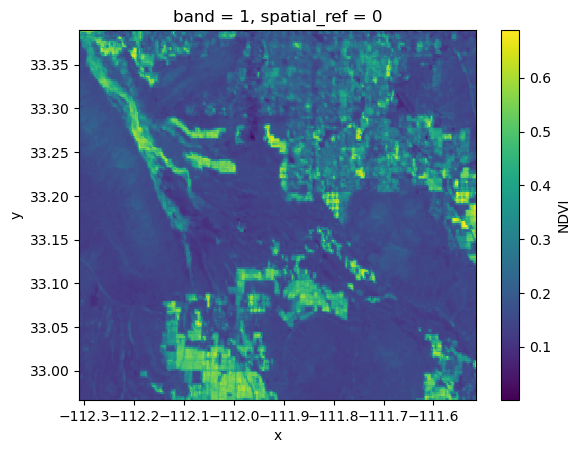

In [7]:
mean_ndvi_2012_2022 = ndvi_da.sel(date=slice('2012', '2022')).mean('date').NDVI
mean_ndvi_2012_2022
mean_ndvi_2012_2022.plot()

In [8]:
mean_ndvi_2012_2022.hvplot(cmap='Greens', clim=(0, 1), title='Mean NDVI 2012-2022')

:Image   [y,x]   (NDVI)

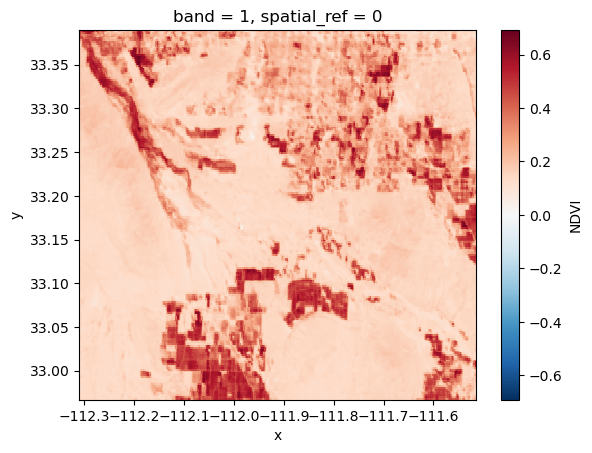

In [9]:
mean_ndvi_2001_2011 = ndvi_da.sel(date=slice('2001', '2011')).mean('date').NDVI
mean_ndvi_2001_2011.plot()

In [10]:
# Compute the difference in NDVI before and after

ndvi_diff =(
    ndvi_da
    .sel(date = slice('2012', '2022' ))
    .mean('date')
    .NDVI
    -ndvi_da
    .sel(date=slice('2001', '2011'))
    .mean('date')
    .NDVI
)

ndvi_diff




<xarray.DataArray 'NDVI' (y: 203, x: 382)> Size: 310kB
array([[-0.05567682, -0.0292117 ,  0.00586349, ...,  0.01543377,
         0.01543377,  0.00927271],
       [-0.07940263, -0.03390124, -0.02959213, ...,  0.01815718,
         0.01815718,  0.0177182 ],
       [-0.17723629, -0.08530393,  0.01360923, ...,  0.01517531,
         0.00823637,  0.01195324],
       ...,
       [-0.0115844 , -0.0115844 , -0.00991558, ..., -0.00157142,
        -0.00157142,  0.00205326],
       [-0.01115062, -0.01115062, -0.00994415, ...,  0.00598571,
         0.00598571, -0.00095583],
       [-0.00930774, -0.00849222, -0.01209998, ..., -0.0296714 ,
        -0.02090381, -0.03258313]], shape=(203, 382), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 2kB 33.39 33.39 33.38 33.38 ... 32.97 32.97 32.97
    spatial_ref  int64 8B 0

In [11]:
#plot the difference

(
    ndvi_diff.hvplot(x='x', y='y', cmap='PiYG', geo=True,
                     title = 'NDVI difference in Gila River : (2012-2022) minus (2001-2011)',)
    *
    boundary_gdf.hvplot(x='x', y='y', geo=True, fill_color= None, line_color='black')
)

:Overlay
   .Image.I    :Image   [x,y]   (NDVI)
   .Polygons.I :Polygons   [x,y]

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [12]:
%store ndvi_diff

Stored 'ndvi_diff' (DataArray)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!